# Projekt „Startup Growth & Funding Trends“  

## Gruppenmitglieder  
- Tom Scheider 
- Mark Nolepa
- Lukas Trölsch
- Silas Engel

## Kurz-Review des Datensatzes  
- Der Datensatz stammt von Kaggle und trägt den Titel **„Startup Growth & Funding Trends“**. 
- Er enthält Daten zu Start-ups, deren Wachstum und Finanzierungsrunden („funding rounds“) über verschiedene Jahre und Regionen hinweg.  
- Typische Merkmale sind: Start-up-Name, Branche, Finanzierungsbetrag, Datum der Runde, Investor(en) 
- Ziel: Trends im Startup-Ökosystem identifizieren – z. B. wie häufig Finanzierungsrunden stattfinden, wie groß die Beträge sind, welche Branchen und Regionen dominieren.

## Hyperlink zum Datensatz  
[Startup Growth & Funding Trends – Kaggle](https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends/data)

## Unser Geschäftsziel  
- Wir möchten anhand des Datensatzes, **große Mengen an StartUps  ressourcen effizient für Investoren bewerten, um mögliche UNICORNS zu identifizieren**. 
- Zudem wollen wir ein **Empfehlungsmodell** entwickeln, das Investoren unterstützt bei der Frage: *„In welche Start-ups mit hohem Wachstumspotenzial sollte ich investieren?“*  
- Langfristig zielt unser Projekt darauf ab, **Entscheidungshilfen für Gründer und Investoren** bereitzustellen und **Marktchancen frühzeitig zu erkennen**.



## Installation und Importe
- Im folgenden werden alle **Module installiert**, welche Sie noch nicht bereits Installiert haben. 
- Anschließend werden alle erforderlichen **Programme importiert und eingelesen**, damit wir anschließend mit ihnen arbeiten können. 

In [6]:
import subprocess
import sys

# Methode, die überprüft, ob ein Modul installiert ist, und es bei Bedarf installiert.
# Methode wurde inspiriert durch: https://medium.com/@ryan_forrester_/fixing-no-module-named-error-in-python-3d5f79cbb44c
def installiere_Wenn_Modul_Fehl(Modul: str):
    try:
        # versucht, das Modul zu importieren
        __import__(Modul)
    except ImportError:
        # falls das Modul nicht gefunden wird (ImportError), wird es installiert
        subprocess.check_call([sys.executable, "-m", "pip", "install", Modul])

# Installation der benötigten Module (falls sie fehlen)
installiere_Wenn_Modul_Fehl("kagglehub")
installiere_Wenn_Modul_Fehl("pandas")
installiere_Wenn_Modul_Fehl("seaborn")
installiere_Wenn_Modul_Fehl("matplotlib")

print("Alle benötigten Module sind installiert.")

Alle benötigten Module sind installiert.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("Der Import ist gelungen!")

Der Import ist gelungen!


In [3]:
df = pd.read_csv('startup_data.csv')  

print("Die benötigen Daten wurden geladen!")  

Die benötigen Daten wurden geladen!


## Informationen zum Datensatz

- Im folgenden wird zum Verständnis für das spätere Bearbeiten, die Datentypen deklariert und wichtige Kennzhalen angegeben.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [32]:
df.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


# StartUp growth & funding values

# Teil 1: Business Understanding & Datenexploration

## 1.1 Business Kontext

### Business Problem
**Erkennen potenzieller Unicorns**:
- Unser Ziel ist es, mithilfe der verfügbaren CSV-Daten Unternehmen zu identifizieren, die ein besonders hohes Wachstumspotenzial aufweisen und sich somit zu sogenannten Unicorns (Start-ups mit einer Bewertung über einer Milliarde US-Dollar) entwickeln könnten.

**Risiko-Segmentierung**:
- Darüber hinaus möchten wir durch datenbasierte Analysen eine Risiko-Segmentierung vornehmen, um Start-ups anhand relevanter Faktoren in verschiedene Risikokategorien einzuteilen und so fundierte Investitionsentscheidungen zu unterstützen.

### Geschäftsfragen

- **Welche Kennzahlen beeinflussen die Profitabilität als Investor?**
- **Wie gut kann ein datenbasiertes Modell vorhersagen auf profitable StartUps treffen?**


## Warum Data-Science?

### 🎯 Zielsetzung unserer Analyse

- Unsere Analyse verfolgt das Ziel, datenbasierte Entscheidungen im Bereich **Start-up-Investitionen** zu unterstützen und psychologische Verzerrungen bei der Bewertung von Unternehmen zu reduzieren.  

### 🧩 Überblick über große Start-up-Mengen
Angesichts der Vielzahl an bestehenden und neu gegründeten Start-ups ist es für Investoren schwierig, den Überblick zu behalten. Durch den Einsatz datenanalytischer Methoden soll eine strukturierte und effiziente Übersicht über große Start-up-Mengen geschaffen werden.

### 🔍 Herausfiltern besonders relevanter Start-ups
Ein zentrales Anliegen ist es, aus dieser großen Menge **besonders relevante und vielversprechende Start-ups** zu identifizieren – also jene Unternehmen, die überdurchschnittliches Wachstumspotenzial oder einzigartige Marktchancen bieten.

### 🧠 Reduktion von subjektiven Verzerrungen
Traditionelle Investitionsentscheidungen sind oft von **Bauchgefühl** und **kognitiven Verzerrungen (Biases)** beeinflusst. Zu den häufigsten zählen:
- **Confirmation Bias:** Die Tendenz, Informationen so zu interpretieren, dass sie bestehende Überzeugungen bestätigen.  
- **Halo-Effekt:** Die Neigung, ein Unternehmen aufgrund einzelner positiver Merkmale insgesamt zu überschätzen.  
- **Recency Bias:** Jüngste Ereignisse werden überbewertet, während ältere, aber relevante Informationen vernachlässigt werden.  

### 📊 Datenbasierte Investitionsentscheidungen
Durch die Analyse von Start-up-Daten (z. B. Finanzierungsrunden, Branchenzugehörigkeit, Wachstumstrends) soll eine **objektive und nachvollziehbare Entscheidungsgrundlage** geschaffen werden.  
Dies ermöglicht Investoren, Chancen und Risiken faktenbasiert zu bewerten und die Wahrscheinlichkeit erfolgreicher Investments zu erhöhen.


## 1.2 Explorative Datenanalyse

### Daten-Visualisierung


### Graph V1

### 📊 Vergleich der Umsätze profitabler und unprofitabler Start-ups

Der folgende Boxplot visualisiert die Verteilung des **Umsatzes (Revenue in Mio. USD)** zwischen profitablen und unprofitablen Start-ups.  
Durch diese Darstellung können wir auf einen Blick erkennen, wie stark sich die Umsatzstrukturen zwischen beiden Gruppen unterscheiden.

### 🔍 Zweck der Visualisierung
- Der **Boxplot** zeigt Median, Quartile und mögliche Ausreißer der Umsatzverteilung für jede Kategorie („Profitabel“ vs. „Unprofitabel“).  
- Zusätzlich sind die **durchschnittlichen Umsatzwerte** oberhalb der Boxen markiert, um einen schnellen quantitativen Vergleich zu ermöglichen.  
- Diese Visualisierung hilft uns zu verstehen, **ob ein klarer Zusammenhang zwischen Profitabilität und Umsatzhöhe besteht**, und liefert somit wertvolle Hinweise auf die Wachstums- und Erfolgsfaktoren von Start-ups.

### 💡 Warum dieser Graph wichtig ist
Ein datenbasierter Vergleich der finanziellen Kennzahlen reduziert subjektive Einschätzungen und ermöglicht eine **objektivere Bewertung von Geschäftsmodellen**.  
So können potenziell erfolgreiche Start-ups frühzeitig identifiziert und Investitionsentscheidungen besser begründet werden.


/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_40768/4186240759.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Profitable", y=metric, data=df, palette="coolwarm", order=order)
/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_40768/4186240759.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


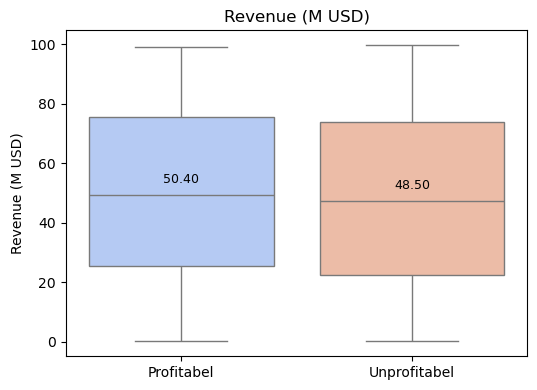

In [4]:
metrics = ["Revenue (M USD)"]
order = [1, 0]
labels = ["Profitabel", "Unprofitabel"]

plt.figure(figsize=(15, 4))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    ax = sns.boxplot(x="Profitable", y=metric, data=df, palette="coolwarm", order=order)
    ax.set_xticklabels(labels)
    ax.set_xlabel("")
    plt.title(f"{metric}")

    for j, prof_value in enumerate(order):
        mean_val = df[df["Profitable"] == prof_value][metric].mean()
        ax.text(j, mean_val + (df[metric].max() * 0.03), f"{mean_val:.2f}", 
                ha='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### Graph V2

### Verteilung Anzahl der StartUps nach Industrie 


/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_27290/3445576098.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


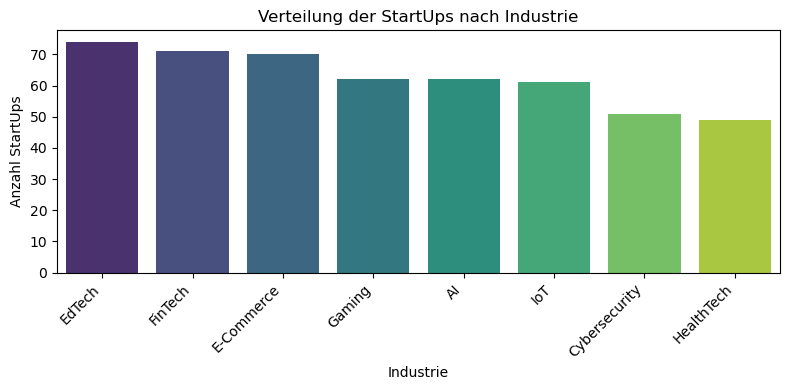

Antwort: Die meisten StartUps stammen aus der Industrie 'EdTech' mit 74 Unternehmen.


In [34]:
# Verteilung Anzahl der StartUps nach Industrie (Säulendiagramm) + kurze Antwort
industry_counts = df['Industry'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
plt.ylabel("Anzahl StartUps")
plt.xlabel("Industrie")
plt.title("Verteilung der StartUps nach Industrie")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_industry = industry_counts.index[0]
top_count = industry_counts.iloc[0]
print(f"Antwort: Die meisten StartUps stammen aus der Industrie '{top_industry}' mit {top_count} Unternehmen.")

### Graph V3

### Verteilung der StartUps nach Region

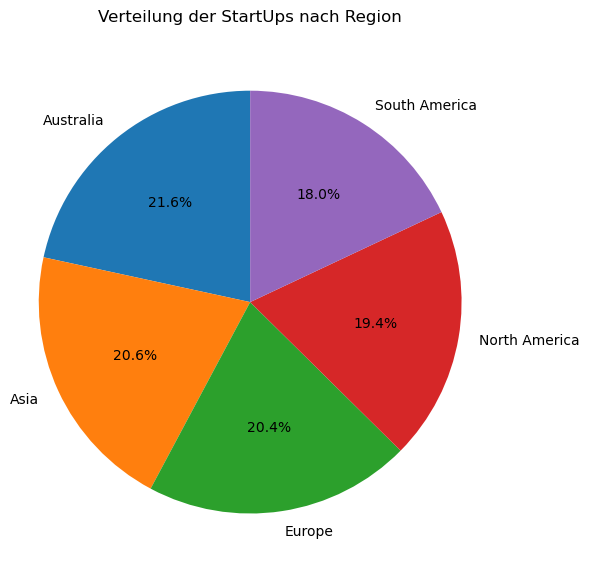

Antwort: Die meisten StartUps stammen aus der Region 'Australia' mit 108 Unternehmen (21.6%).


In [7]:
 #..existing code...
region_counts = df['Region'].value_counts().sort_values(ascending=False)

# ALT (Balkendiagramm)
# plt.figure(figsize=(8,4))
# sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
# plt.ylabel("Anzahl StartUps")
# plt.xlabel("Region")
# plt.title("Verteilung der StartUps nach Region")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

# NEU (Kreisdiagramm)
plt.figure(figsize=(6,6))
plt.pie(
    region_counts.values,
    labels=region_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Verteilung der StartUps nach Region")
plt.axis("equal")
plt.tight_layout()
plt.show()

top_region = region_counts.index[0]
top_count = region_counts.iloc[0]
share = top_count / region_counts.sum() * 100
print(f"Antwort: Die meisten StartUps stammen aus der Region '{top_region}' mit {top_count} Unternehmen ({share:.1f}%).")
# ...existing code...#ä##

### Graph V4

### Marktanteilanalyse

Die Marktanteilanalyse spalten wir in zwei Teile. Der erste wird analysieren wie hoch der Marktanteil der Unternehmen im Vergleich zu den restlichen 499 ist und im zweiten Teil geht es um die Analyse von den Unternehmen im Verhältnis zu den Konkurrenten im selben Marktbereich.


In [22]:
# Verwende die vorhandenen Startup-Daten (eff_df) und gültige Spaltennamen
top30 = eff_df.nlargest(30, "Valuation (M USD)")
top30 = top30[top30["Revenue (M USD)"] > 0]

fig = px.scatter(
    top30,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Valuation (M USD)",
    color="Industry",
    hover_name="Startup Name",
    log_x=True,
    size_max=60,
    title="Top 30 Startups nach Bewertung (Bubble Chart)"
)
fig.show()

In [24]:
# ...existing code...
# Marktanteil innerhalb des Wirtschaftszweigs (Revenue-basiert) berechnen
eff_df["Industry Total Revenue"] = eff_df.groupby("Industry")["Revenue (M USD)"].transform("sum")
eff_df["Industry Market Share (%)"] = (eff_df["Revenue (M USD)"] / eff_df["Industry Total Revenue"]) * 100

# Top 30 nach Bewertung, nur mit Umsatz > 0
top30 = eff_df.nlargest(30, "Valuation (M USD)")
top30 = top30[top30["Revenue (M USD)"] > 0]

# Größen-Skalierung für Bubble-Chart
sizes = top30["Industry Market Share (%)"]
sizeref = 2.0 * sizes.max() / (60.0 ** 2)  # size_max=60

fig = px.scatter(
    top30,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Industry Market Share (%)",  # Bubble-Größe = Marktanteil
    color="Industry",
    hover_name="Startup Name",
    hover_data={"Industry Market Share (%)": True, "Revenue (M USD)": True, "Valuation (M USD)": True},
    log_x=True,
    size_max=60,
    title="Top 30 Startups nach Bewertung (Bubble Chart, Größe = Marktanteil im Wirtschaftszweig)"
)
fig.update_traces(marker=dict(sizeref=sizeref, sizemin=4))
fig.show()
# ...existing code...

In [25]:
# ...existing code...
# Marktanteil innerhalb des Wirtschaftszweigs (Revenue-basiert) berechnen
eff_df["Industry Total Revenue"] = eff_df.groupby("Industry")["Revenue (M USD)"].transform("sum")
eff_df["Industry Market Share (%)"] = (eff_df["Revenue (M USD)"] / eff_df["Industry Total Revenue"]) * 100

# Top 30 nach Bewertung, nur mit Umsatz > 0
top100 = eff_df.nlargest(100, "Valuation (M USD)")
top100 = top100[top100["Revenue (M USD)"] > 0]

# Größen-Skalierung für Bubble-Chart
sizes = top30["Industry Market Share (%)"]
sizeref = 2.0 * sizes.max() / (60.0 ** 2)  # size_max=60

fig = px.scatter(
    top100,
    x="Revenue (M USD)",
    y="Valuation (M USD)",
    size="Industry Market Share (%)",  # Bubble-Größe = Marktanteil
    color="Industry",
    hover_name="Startup Name",
    hover_data={"Industry Market Share (%)": True, "Revenue (M USD)": True, "Valuation (M USD)": True},
    log_x=True,
    size_max=60,
    title="Top 100 Startups nach Bewertung (Bubble Chart, Größe = Marktanteil im Wirtschaftszweig)"
)
fig.update_traces(marker=dict(sizeref=sizeref, sizemin=4))
fig.show()
# ...existing code...

### Graph V5

### Wo entsteht am meisten Umsatz pro investieretem USD?


Umsatz-Effizienz (Revenue / Funding) nach Branche (höher = mehr Umsatz pro investiertem USD):
               Mean_Ratio  Median_Ratio  Count
Industry                                      
HealthTech          3.811         0.378     49
Gaming              2.248         0.304     62
FinTech             1.099         0.294     71
IoT                 0.932         0.290     61
EdTech              0.894         0.325     74
AI                  0.756         0.334     62
E-Commerce          0.620         0.339     70
Cybersecurity       0.562         0.347     51

Umsatz-Effizienz nach Region:
               Mean_Ratio  Median_Ratio  Count
Region                                        
Europe              2.074         0.366    102
South America       1.349         0.300     90
Australia           1.047         0.336    108
North America       1.010         0.296     97
Asia                0.991         0.296    103

Top 10 Startups nach Umsatz-Effizienz:
    Startup Name    Industry        

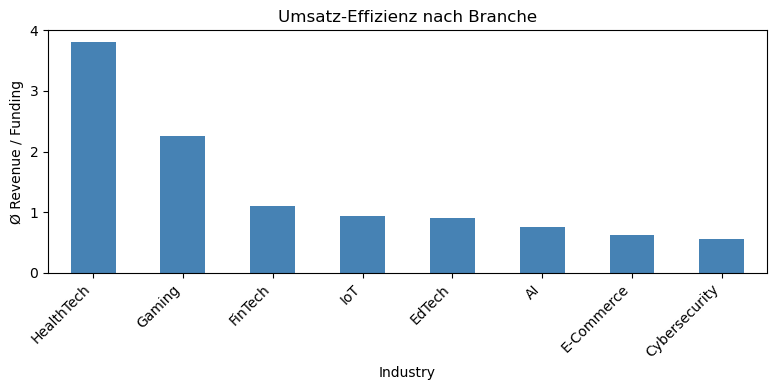

In [8]:
# Frage 1: Wo entsteht am meisten Umsatz pro investiertem USD?
# Kennzahl: Umsatz-Effizienz = Revenue (M USD) / Funding Amount (M USD)

eff_df = df.assign(
    Revenue_per_Invested_USD=df['Revenue (M USD)'] / df['Funding Amount (M USD)']
)

# Aggregation nach Branche und Region
eff_industry = (
    eff_df.groupby('Industry')
    .agg(Mean_Ratio=('Revenue_per_Invested_USD', 'mean'),
         Median_Ratio=('Revenue_per_Invested_USD', 'median'),
         Count=('Revenue_per_Invested_USD', 'size'))
    .sort_values('Mean_Ratio', ascending=False)
    .round(3)
)

eff_region = (
    eff_df.groupby('Region')
    .agg(Mean_Ratio=('Revenue_per_Invested_USD', 'mean'),
         Median_Ratio=('Revenue_per_Invested_USD', 'median'),
         Count=('Revenue_per_Invested_USD', 'size'))
    .sort_values('Mean_Ratio', ascending=False)
    .round(3)
)

# Top 10 einzelne Startups nach Effizienz
top_startups = (
    eff_df[['Startup Name','Industry','Region','Funding Amount (M USD)','Revenue (M USD)','Revenue_per_Invested_USD']]
    .sort_values('Revenue_per_Invested_USD', ascending=False)
    .head(10)
    .round(3)
)

print("Umsatz-Effizienz (Revenue / Funding) nach Branche (höher = mehr Umsatz pro investiertem USD):")
print(eff_industry)
print("\nUmsatz-Effizienz nach Region:")
print(eff_region)
print("\nTop 10 Startups nach Umsatz-Effizienz:")
print(top_startups)

best_industry = eff_industry.index[0]
best_industry_value = eff_industry.iloc[0]['Mean_Ratio']
best_region = eff_region.index[0]
best_region_value = eff_region.iloc[0]['Mean_Ratio']

print(f"\nAntwort: Die höchste durchschnittliche Umsatz-Effizienz liegt in der Branche '{best_industry}' (Ø {best_industry_value:.3f} Umsatz pro investiertem USD).")
print(f"Regional erzielt '{best_region}' die beste Effizienz (Ø {best_region_value:.3f}).")

# Optional: einfache Visualisierung nach Branche
plt.figure(figsize=(8,4))
eff_industry['Mean_Ratio'].plot(kind='bar', color='steelblue')
plt.ylabel('Ø Revenue / Funding')
plt.title('Umsatz-Effizienz nach Branche')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Graph V6

### Wie effienzient wird Personal skaliert?

➤ Umsatz-Effizienz (Revenue pro Mitarbeiter) nach Branche:
               Mean_Rev_per_Emp  Median_Rev_per_Emp  Count
Industry                                                  
Cybersecurity             0.105               0.021     51
HealthTech                0.060               0.019     49
E-Commerce                0.052               0.024     70
AI                        0.045               0.024     62
Gaming                    0.041               0.020     62
FinTech                   0.039               0.020     71
EdTech                    0.033               0.018     74
IoT                       0.027               0.014     61

➤ Umsatz-Effizienz nach Region:
               Mean_Rev_per_Emp  Median_Rev_per_Emp  Count
Region                                                    
Asia                      0.092               0.022    103
North America             0.043               0.021     97
Australia                 0.043               0.018    108
Europe                 

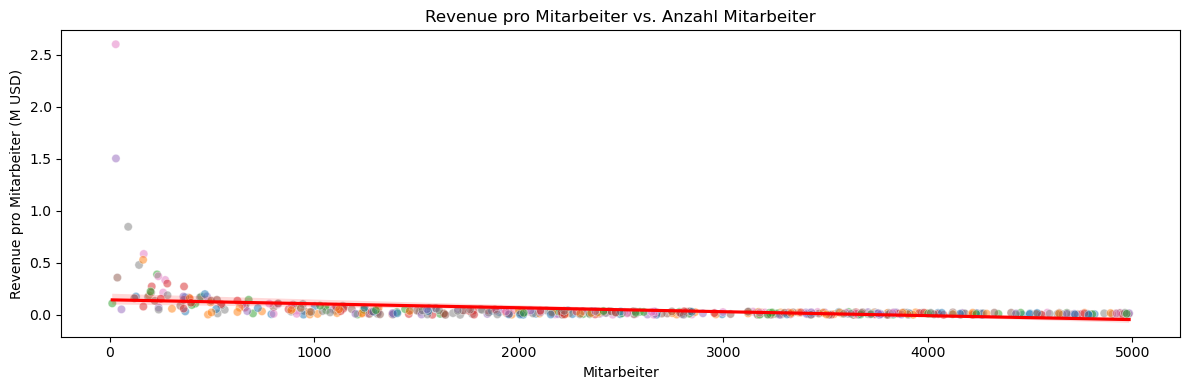

In [37]:
# Analyse 1.3: Effizienz der Personalskalierung (Revenue-Fokus)
# Kennzahl: Revenue_per_Employee = Umsatz (M USD) je Mitarbeiter

base_df = eff_df.copy() if 'eff_df' in globals() else df.copy()

work_emp = base_df.copy()
work_emp['Employees_nonzero'] = work_emp['Employees'].replace(0, np.nan)
work_emp['Revenue_per_Employee'] = work_emp['Revenue (M USD)'] / work_emp['Employees_nonzero']

# Aggregation nach Branche und Region
agg_industry = (
    work_emp.groupby('Industry')
    .agg(
        Mean_Rev_per_Emp=('Revenue_per_Employee', 'mean'),
        Median_Rev_per_Emp=('Revenue_per_Employee', 'median'),
        Count=('Revenue_per_Employee', 'size')
    )
    .sort_values('Mean_Rev_per_Emp', ascending=False)
    .round(3)
)

agg_region = (
    work_emp.groupby('Region')
    .agg(
        Mean_Rev_per_Emp=('Revenue_per_Employee', 'mean'),
        Median_Rev_per_Emp=('Revenue_per_Employee', 'median'),
        Count=('Revenue_per_Employee', 'size')
    )
    .sort_values('Mean_Rev_per_Emp', ascending=False)
    .round(3)
)

top_startups_emp = (
    work_emp[['Startup Name','Industry','Region','Employees','Revenue (M USD)','Revenue_per_Employee']]
    .sort_values('Revenue_per_Employee', ascending=False)
    .head(10)
    .round(3)
)

print("➤ Umsatz-Effizienz (Revenue pro Mitarbeiter) nach Branche:")
print(agg_industry.head(10))
print("\n➤ Umsatz-Effizienz nach Region:")
print(agg_region)
print("\n➤ Top 10 Startups nach Revenue pro Mitarbeiter:")
print(top_startups_emp)

best_ind = agg_industry.index[0]
best_ind_val = agg_industry.iloc[0]['Mean_Rev_per_Emp']
best_reg = agg_region.index[0]
best_reg_val = agg_region.iloc[0]['Mean_Rev_per_Emp']

# Korrelationen (Spearman) mit Revenue_per_Employee
corr_vars = ['Employees','Funding Amount (M USD)','Valuation (M USD)','Revenue (M USD)','Profitable']
corr_df = work_emp[corr_vars + ['Revenue_per_Employee']].corr(method='spearman')['Revenue_per_Employee'].drop('Revenue_per_Employee').round(3)

print("\nSpearman-Korrelationen mit Revenue_per_Employee (positiv = steigt mit Kennzahl):")
print(corr_df)

print("\nAntwort 1.3:")
print(
    f"Die höchste durchschnittliche Umsatz-Effizienz (Revenue pro Mitarbeiter) liegt in der Branche '{best_ind}' (Ø {best_ind_val:.3f} M USD je Mitarbeiter) "
    f"und regional in '{best_reg}' (Ø {best_reg_val:.3f}). "
    "Korrelationen zeigen, ob größere Teams oder höhere Bewertungen mit Effizienz zusammenhängen. "
    "Interpretation: "
    + ("Mehr Mitarbeiter senken Effizienz. " if corr_df['Employees'] < 0 else "Mehr Mitarbeiter erhöhen Effizienz oder neutral. ")
    + ("Höhere Bewertung korreliert positiv. " if corr_df['Valuation (M USD)'] > 0 else "Bewertung zeigt keinen klar positiven Zusammenhang. ")
    + ("Höherer Gesamtumsatz setzt sich teils in Effizienz um. " if corr_df['Revenue (M USD)'] > 0 else "Gesamtumsatz steigert nicht zwingend Effizienz. ")
)

# Optionale Visualisierung
plt.figure(figsize=(12,4))
sns.scatterplot(data=work_emp, x='Employees', y='Revenue_per_Employee', hue='Industry', legend=False, alpha=0.5)
sns.regplot(data=work_emp, x='Employees', y='Revenue_per_Employee', scatter=False, color='red')
plt.title('Revenue pro Mitarbeiter vs. Anzahl Mitarbeiter')
plt.xlabel('Mitarbeiter')
plt.ylabel('Revenue pro Mitarbeiter (M USD)')
plt.tight_layout()
plt.show()

### Graph V7

### Hebt ein höherer Marktanteil die Bewertung, Profitabilität und Kapital-Effizienz?

Spearman-Korrelationen mit Marktanteil (positiv = steigt mit Marktanteil):
Valuation (M USD)           0.106
Revenue_per_Invested_USD   -0.059
Profitable                  0.118
Name: Market Share (%), dtype: float64

Kennzahlen nach Marktanteils-Quartilen:
                      Ø_Bewertung  Ø_Kapital_Effizienz  \
Market Share Quartil                                     
Q1 (niedrig)             1218.201                1.503   
Q2                       1333.876                0.908   
Q3                       1389.514                1.394   
Q4 (hoch)                1546.571                1.360   

                      IPO_Profitabilität_Rate    n  
Market Share Quartil                                
Q1 (niedrig)                            0.381  126  
Q2                                      0.347  124  
Q3                                      0.512  125  
Q4 (hoch)                               0.488  125  


/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_27290/3039187561.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work.groupby('Market Share Quartil')
/var/folders/h6/xnldbwzs6z5g_n88vb8sq7j40000gn/T/ipykernel_27290/3039187561.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_ms.reset_index(), x='Market Share Quartil', y='IPO_Profitabilität_Rate', palette='viridis')


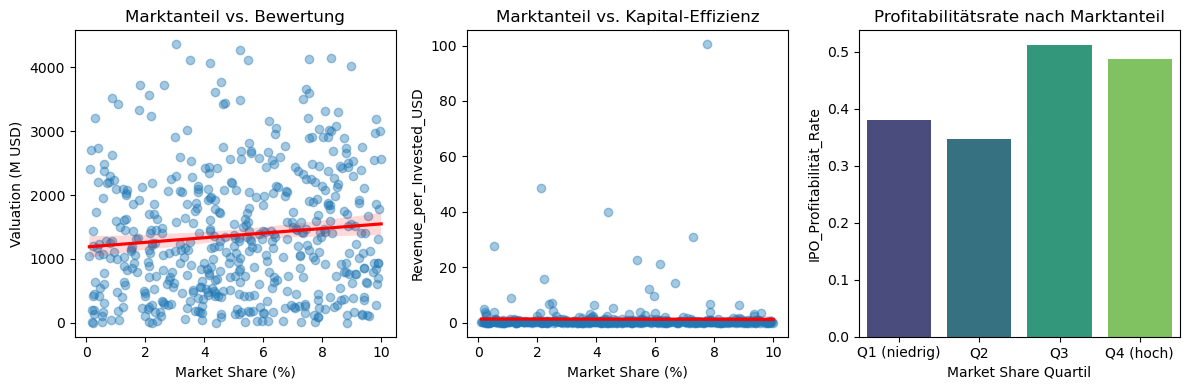


Antwort 1.4: Ein höherer Marktanteil korreliert positiv mit der Bewertung (0.106), negativ/neutral mit der Kapital-Effizienz (-0.059) und positiv mit der Profitabilität (0.118). Die Quartile stützen diesen Trend.


In [41]:
# 1.4 Hebt ein höherer Marktanteil die Bewertung, Profitabilität und Kapital-Effizienz?

# Arbeitsdaten mit Kapital-Effizienz (Revenue/Funding)
work = eff_df.copy() if 'eff_df' in globals() else df.assign(
    Revenue_per_Invested_USD=df['Revenue (M USD)'] / df['Funding Amount (M USD)']
).copy()

# Korrelationen (Spearman) zwischen Marktanteil und Zielgrößen
corr = (
    work[['Market Share (%)', 'Valuation (M USD)', 'Revenue_per_Invested_USD', 'Profitable']]
    .corr(method='spearman')
    .loc['Market Share (%)']
    .drop('Market Share (%)')
    .round(3)
)

print("Spearman-Korrelationen mit Marktanteil (positiv = steigt mit Marktanteil):")
print(corr)

# Quartile des Marktanteils und aggregierte Metriken
work['Market Share Quartil'] = pd.qcut(
    work['Market Share (%)'], 4,
    labels=['Q1 (niedrig)', 'Q2', 'Q3', 'Q4 (hoch)'],
    duplicates='drop'
)

agg_ms = (
    work.groupby('Market Share Quartil')
    .agg(
        Ø_Bewertung=('Valuation (M USD)', 'mean'),
        Ø_Kapital_Effizienz=('Revenue_per_Invested_USD', 'mean'),
        IPO_Profitabilität_Rate=('Profitable', 'mean'),
        n=('Profitable', 'size')
    )
    .round(3)
)

print("\nKennzahlen nach Marktanteils-Quartilen:")
print(agg_ms)

# Kurze Visualisierung
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.regplot(data=work, x='Market Share (%)', y='Valuation (M USD)', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Marktanteil vs. Bewertung')

plt.subplot(1,3,2)
sns.regplot(data=work, x='Market Share (%)', y='Revenue_per_Invested_USD', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Marktanteil vs. Kapital-Effizienz')

plt.subplot(1,3,3)
sns.barplot(data=agg_ms.reset_index(), x='Market Share Quartil', y='IPO_Profitabilität_Rate', palette='viridis')
plt.title('Profitabilitätsrate nach Marktanteil')
plt.tight_layout()
plt.show()

# Fazit in einem Satz
trend_bew = "positiv" if corr['Valuation (M USD)'] > 0 else "negativ/neutral"
trend_eff = "positiv" if corr['Revenue_per_Invested_USD'] > 0 else "negativ/neutral"
trend_prof = "positiv" if corr['Profitable'] > 0 else "negativ/neutral"

print(
    f"\nAntwort 1.4: Ein höherer Marktanteil korreliert {trend_bew} mit der Bewertung "
    f"({corr['Valuation (M USD)']}), {trend_eff} mit der Kapital-Effizienz "
    f"({corr['Revenue_per_Invested_USD']}) und {trend_prof} mit der Profitabilität "
    f"({corr['Profitable']}). Die Quartile stützen diesen Trend."
)

## 1.3 Statistische Analyse

- In diesem Abschnitt behandeln wir die Abhängigkeit der einzelnen Kenndaten von einander und führen dabei einige Korrelationsanalysen durch.

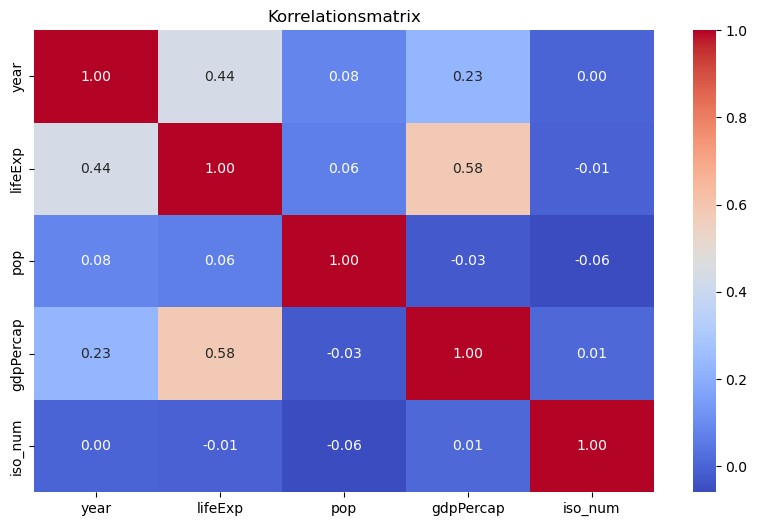

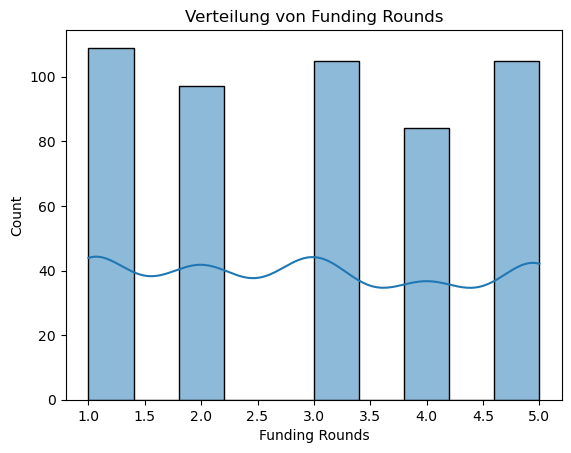

In [30]:
# Heatmap der Korrelationen
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# Beispiel-Verteilung für erste numerische Spalte (robust gegen KeyError)
plot_df = df
if 'numeric_cols' in globals():
	# Falls keine der erwarteten Spalten in df ist, aber eff_df existiert → auf eff_df wechseln
	if len([c for c in numeric_cols if c in df.columns]) == 0 and 'eff_df' in globals():
		plot_df = eff_df

numeric_cols_plot = plot_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols_plot):
	num_col = numeric_cols_plot[0]
	sns.histplot(plot_df[num_col], kde=True)
	plt.title(f"Verteilung von {num_col}")
	plt.show()
else:
	print("Keine numerischen Spalten zum Plotten vorhanden.")


# Teil 2: Datenaufbereitung & Feature Engineering

## 2.1 Datenqualität

In den folgenden Schritten identifizieren wir zuerst die Vollständigkeit des Datensatzes und anschließend die systematischen Ausreißer für numerische (nicht-binäre) Features mittels der IQR‑Methode.
Kurzüberblick der Abläufe:

- Berechnung von Q1 (25%) und Q3 (75%) und des IQR = Q3 − Q1; Festlegung der Schwellen für 1.5×IQR (moderate Ausreißer) und 3.0×IQR (extreme Ausreißer).
- Erstellung boolescher Masken pro Feature/Zeile: True = Wert ist außerhalb der jeweiligen Schwelle.
- Aufbau einer zusammenfassenden Tabelle mit Q1/Q3/IQR sowie Anzahl und Prozent der Ausreißer pro Feature.
- Identifikation der betroffenen Zeilen (Top N) und optionale Visualisierung als Heatmap, um Muster über Features hinweg zu sehen.

Hinweis: Ausreißer sollten nicht automatisch gelöscht werden. Zuerst kontextuell prüfen (Messfehler, echte Spezialfälle), dann entscheiden: markieren, transformieren (z.B. log), winsorisieren (Extremwerte begrenzen) oder robustere Methoden (MAD, IsolationForest) verwenden.


In [33]:
print("🔍 Datenqualitäts-Zusammenfassung:")
print(f"- Zeilen: {df.shape[0]}, Spalten: {df.shape[1]}")
print(f"- Fehlende Werte: {df.isnull().sum().sum()}")

# Fallbacks definieren, falls vorherige Zellen nicht ausgeführt wurden
if 'duplicates' not in globals():
	duplicates = df.duplicated().sum()

# Sicherstellen, dass numpy verfügbar ist (falls frühere Import-Zelle nicht ausgeführt wurde)
if 'np' not in globals():
	import numpy as np

if 'numeric_cols' not in globals():
	numeric_cols = df.select_dtypes(include=[np.number]).columns

cat_cols = df.select_dtypes(exclude=[np.number]).columns

print(f"- Doppelte Zeilen: {duplicates}")
print(f"- Numerische Spalten: {len(numeric_cols)}")
print(f"- Kategorische Spalten: {len(cat_cols)}")

🔍 Datenqualitäts-Zusammenfassung:
- Zeilen: 500, Spalten: 20
- Fehlende Werte: 0
- Doppelte Zeilen: 0
- Numerische Spalten: 8
- Kategorische Spalten: 4


In [34]:
# Ausreißer-Identifikation (IQR-Methode) auf numerischen Features
# Ziel: Für jede numerische (nicht-binäre) Spalte IQR berechnen und Ausreißer nach 1.5x und 3x IQR markieren.

# Numerische Spalten bestimmen und binäre Variablen (z.B. Profitable) ausschließen
_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # alle numerischen Spalten
_binary_cols = [c for c in _numeric_cols if df[c].dropna().nunique() <= 2]  # Spalten mit <=2 eindeutigen Werten (binär)
num_cols_iqr = [c for c in _numeric_cols if c not in _binary_cols]  # nur echte numerische Features (keine 0/1 Indikatoren)

# IQR-Grenzen berechnen und Ausreißer-Masken (1.5x IQR und 3x IQR) erstellen
outlier_records = []  # speichern von Q1/Q3/IQR und Ausreißerstatistiken pro Feature
outlier_mask_15 = pd.DataFrame(False, index=df.index, columns=num_cols_iqr)  # bool-matrix: True = Ausreißer (1.5x)
outlier_mask_30 = pd.DataFrame(False, index=df.index, columns=num_cols_iqr)  # bool-matrix: True = Ausreißer (3x)

for col in num_cols_iqr:
    # Quartile berechnen (Q1=25%, Q3=75%) und IQR bestimmen
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1  # Interquartilsabstand (Robuste Maßzahl für Streuung)

    # Falls IQR nicht definiert (z.B. konstante Spalte) → keine Schwellen setzen
    if pd.isna(iqr) or iqr == 0:
        lower15 = upper15 = lower30 = upper30 = np.nan
        cnt15 = cnt30 = 0
    else:
        # Schwellen für moderate (1.5x) und extreme (3x) Ausreißer festlegen
        lower15, upper15 = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        lower30, upper30 = q1 - 3.0 * iqr, q3 + 3.0 * iqr
        # Masken setzen: True, wenn Wert außerhalb der Grenzen liegt
        outlier_mask_15[col] = (df[col] < lower15) | (df[col] > upper15)
        outlier_mask_30[col] = (df[col] < lower30) | (df[col] > upper30)
        # Anzahl der Ausreißer pro Feature zählen (für Reporting)
        cnt15 = int(outlier_mask_15[col].sum())
        cnt30 = int(outlier_mask_30[col].sum())

    # Statistik-Eintrag für dieses Feature (wird später zu einem DataFrame)
    outlier_records.append({
        'Feature': col,
        'Q1': q1, 'Q3': q3, 'IQR': iqr,
        'Lower_1.5IQR': lower15, 'Upper_1.5IQR': upper15,
        'Lower_3IQR': lower30, 'Upper_3IQR': upper30,
        'Outliers_1.5IQR': cnt15,
        'Outliers_3IQR': cnt30,
        'Outlier_% (1.5IQR)': round(cnt15 / len(df) * 100, 2) if len(df) else 0.0,
    })

# Zusammenfassung: DataFrame mit den Ausreißer-Statistiken pro Feature
outlier_summary = (
    pd.DataFrame(outlier_records)
    .set_index('Feature')
    .sort_values('Outliers_1.5IQR', ascending=False)
)

print("Ausreißer-Zusammenfassung pro Feature (IQR-basiert):")
print(outlier_summary)

# Zeilen mit den meisten Ausreißern (über alle Features) bestimmen
row_outlier_counts = outlier_mask_15.sum(axis=1)  # Anzahl einziger Features mit Ausreißer pro Zeile
rows_with_outliers = row_outlier_counts[row_outlier_counts > 0].sort_values(ascending=False)

if not rows_with_outliers.empty:
    # Kontextspalten auswählen, falls vorhanden (für bessere Interpretation der betroffenen Zeilen)
    key_cols = [c for c in ['Startup Name', 'Industry', 'Region', 'Exit Status'] if c in df.columns]
    preview_cols = key_cols + num_cols_iqr
    top_rows = rows_with_outliers.index[:15]  # Top 15 problematische Zeilen

    print("\nTop-Zeilen mit den meisten Ausreißern (1.5x IQR):")
    display(
        df.loc[top_rows, preview_cols]
          .assign(Outlier_Count=row_outlier_counts.loc[top_rows])
          .sort_values('Outlier_Count', ascending=False)
    )
else:
    print("\nKeine Ausreißer nach 1.5x IQR-Regel gefunden.")


Ausreißer-Zusammenfassung pro Feature (IQR-basiert):
                                       Q1           Q3          IQR  \
Feature                                                               
Rev_per_Emp                      0.008881     0.036881     0.028000   
Capital_Eff                      0.156520     0.644639     0.488119   
Funding_per_Round               26.065125    90.960000    64.894875   
log1p_Funding Amount (M USD)     4.384664     5.426929     1.042265   
log1p_Employees                  7.232552     8.218719     0.986167   
log1p_Valuation (M USD)          6.324399     7.627099     1.302700   
log1p_Revenue (M USD)            3.169790     4.330273     1.160483   
Valuation (M USD)              557.027500  2052.085000  1495.057500   
Funding Rounds                   2.000000     4.000000     2.000000   
Funding Amount (M USD)          79.212500   226.450000   147.237500   
Revenue (M USD)                 22.802500    74.965000    52.162500   
Employees               

,Startup Name,Industry,Region,Exit Status,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Year Founded,Age,Funding_per_Round,Rev_per_Emp,Capital_Eff,log1p_Funding Amount (M USD),log1p_Valuation (M USD),log1p_Revenue (M USD),log1p_Employees,Outlier_Count
253,Startup_254,FinTech,Australia,Private,5,2.04,27.50,43.61,202,6.16,2000,25,0.408000,0.215891,21.377451,1.111858,3.349904,3.797958,5.313206,5
257,Startup_258,HealthTech,Europe,IPO,5,0.84,8.23,84.39,475,7.75,2016,9,0.168000,0.177663,100.464286,0.609766,2.222459,4.447229,6.165418,4
223,Startup_224,AI,Asia,Private,4,15.11,45.55,13.07,164,0.83,1991,34,3.777500,0.079695,0.864990,2.779440,3.840527,2.644045,5.105945,4
187,Startup_188,EdTech,Australia,Private,4,14.56,102.60,35.73,192,2.00,2012,13,3.640000,0.186094,2.453984,2.744704,4.640537,3.603594,5.262690,4
147,Startup_148,AI,Australia,Private,1,3.34,41.83,21.69,3740,3.93,2004,21,3.340000,0.005799,6.494012,1.467874,3.757239,3.121924,8.227108,3
362,Startup_363,FinTech,Asia,Private,1,197.27,2626.61,13.26,37,0.86,1997,28,197.270000,0.358378,0.067218,5.289630,7.873830,2.657458,3.637586,3
85,Startup_86,IoT,South America,Private,2,2.07,6.57,13.22,2298,8.84,2006,19,1.035000,0.005753,6.386473,1.121678,2.024193,2.654649,7.740230,3
408,Startup_409,IoT,Asia,Private,3,12.71,175.23,92.95,465,2.51,1998,27,4.236667,0.199892,7.313139,2.618125,5.171790,4.542763,6.144186,3
142,Startup_143,Gaming,South America,Private,2,0.57,2.48,22.69,4226,4.41,1993,32,0.285000,0.005369,39.807018,0.451076,1.247032,3.165053,8.349248,3
143,Startup_144,AI,North America,Private,5,56.05,169.89,84.71,281,5.54,1991,34,11.210000,0.301459,1.511329,4.043928,5.141020,4.450970,5.641907,3


In [35]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} potenzielle Ausreißer")


Funding Rounds: 0 potenzielle Ausreißer
Funding Amount (M USD): 0 potenzielle Ausreißer
Valuation (M USD): 1 potenzielle Ausreißer
Revenue (M USD): 0 potenzielle Ausreißer
Employees: 0 potenzielle Ausreißer
Market Share (%): 0 potenzielle Ausreißer
Profitable: 0 potenzielle Ausreißer
Year Founded: 0 potenzielle Ausreißer
Age: 0 potenzielle Ausreißer
Funding_per_Round: 46 potenzielle Ausreißer
Rev_per_Emp: 58 potenzielle Ausreißer
Capital_Eff: 56 potenzielle Ausreißer
log1p_Funding Amount (M USD): 31 potenzielle Ausreißer
log1p_Valuation (M USD): 19 potenzielle Ausreißer
log1p_Revenue (M USD): 19 potenzielle Ausreißer
log1p_Employees: 28 potenzielle Ausreißer


## 2.2 Feature Engineering 

## 2.3 Dokumentation

# Teil 3: Modellierung und Evaluation

## 3.1 Modellauswahl

- Dieses Skript trainiert ein **Decision-Tree-Klassifikationsmodell**, um vorherzusagen, ob ein Startup profitabel ist.
- Dazu werden **finanzielle Kennzahlen** (Bewertung, Umsatz, Kapital-Effizienz), **Strukturmerkmale** (Mitarbeiterzahl, Alter) und **kategoriale Informationen*** (Region, Branche) verarbeitet, automatisch bereinigt und in ein modellfähiges Format überführt.
- Das Ergebnis umfasst Ranking der **Top-K Kandidaten**, **Konfusionsmatrix** zur Fehleranalyse und **Feature-Importance** zur Interpretierbarkeit.

Warum dieser Modelltyp?

- **Interpretierbarkeit**: Baum liefert klare Feature-Beiträge (Importance) für Business-Entscheidungen.
- **Umgang mit nichtlinearer Struktur**: Erkennt Schwellen (z. B. Umsatzgrenzen) ohne explizites Feature-Scaling.
- **Mixed Data**: Kombination aus numerischen und kategorialen Features problemlos via Pipeline + OneHot. Robust gegenüber Ausreißern und fehlenden Werten (mit Imputation).
- **Schnelle Trainingszeit und einfache Anpassung** (Tiefe, Blätter zur Kontrolle von Overfitting).
Liefert Wahrscheinlichkeiten zur Priorisierung (Top-K Liste).

ROC-AUC Train: 0.6804894196735505
ROC-AUC Test : 0.580579355365157
   Rank  Row_in_CSV         Name  MarketShare (%)  Valuation (M USD)  \
0     1         426  Startup_426             9.46            1404.78   
1     2         232  Startup_232             5.99            1836.98   
2     3          43   Startup_43             8.41             242.66   
3     4          14   Startup_14             4.87             720.54   
4     5         330  Startup_330             5.40            1537.51   
5     6         218  Startup_218             9.79            2968.26   
6     7          78   Startup_78             5.95            1311.12   
7     8           8    Startup_8             9.02             630.19   
8     9         234  Startup_234             9.26            1016.60   
9    10         289  Startup_289             6.57            2595.86   

   p_profit  Actual_Profitable  
0      0.73                  1  
1      0.73                  0  
2      0.73                  1  
3      0

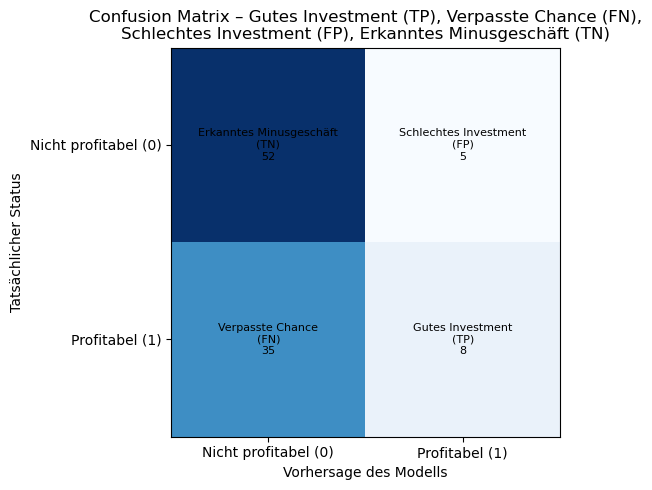

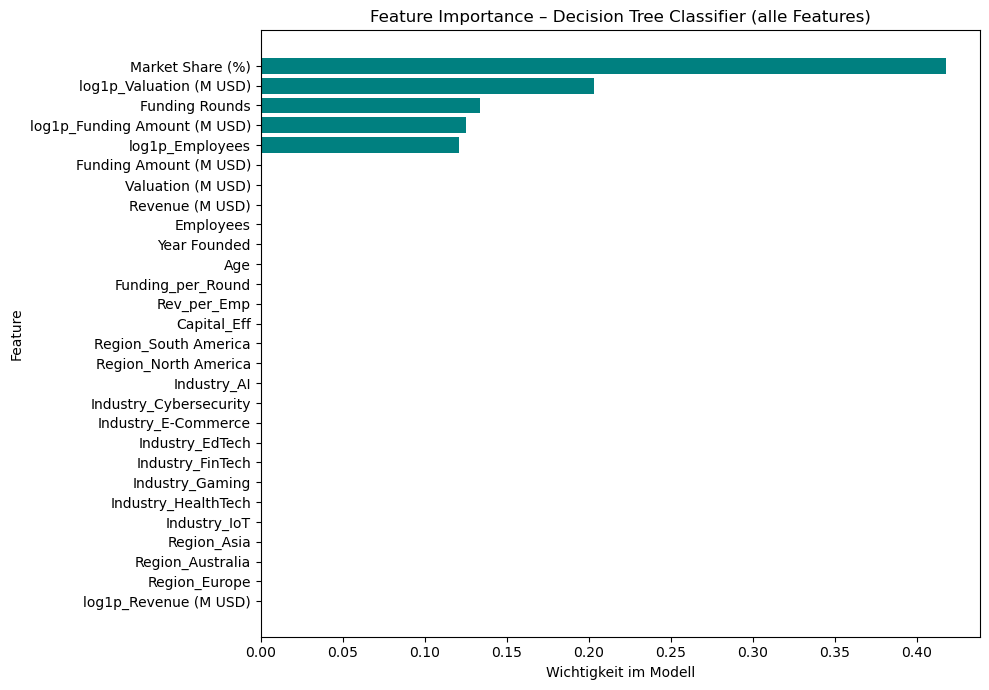

In [32]:
# top10_table_with_feature_importance_and_confusion_plot.py
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

# --- Settings ---
CSV = "startup_data.csv"
TOP_K = 10
RNG = 42
THRESHOLD = 0.7  # Klassifikationsschwelle für "profitabel"

# --- 1) Daten laden ---
df = pd.read_csv(CSV)
y = df["Profitable"].astype(int)

# --- 2) Features ---
num = [
    "Funding Rounds", "Funding Amount (M USD)", "Valuation (M USD)",
    "Revenue (M USD)", "Employees", "Market Share (%)", "Year Founded"
]
cat = ["Industry", "Region"]

# einfache Feature-Engineering-Schritte
df["Age"] = 2025 - df["Year Founded"]
df["Funding_per_Round"] = df["Funding Amount (M USD)"] / df["Funding Rounds"].clip(lower=1)
df["Rev_per_Emp"] = df["Revenue (M USD)"] / df["Employees"].clip(lower=1)
den = df["Funding Amount (M USD)"].replace(0, np.nan)
df["Capital_Eff"] = df["Revenue (M USD)"] / den

for c in ["Funding Amount (M USD)", "Valuation (M USD)", "Revenue (M USD)", "Employees"]:
    df[f"log1p_{c}"] = np.log1p(df[c])

num += [
    "Age", "Funding_per_Round", "Rev_per_Emp", "Capital_Eff",
    "log1p_Funding Amount (M USD)", "log1p_Valuation (M USD)",
    "log1p_Revenue (M USD)", "log1p_Employees"
]

X = df[num + cat].copy()

# --- 3) Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RNG
)

# --- 4) Pipeline + Decision Tree ---
pre = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat)
])

tree = DecisionTreeClassifier(
    max_depth=7,
    min_samples_leaf=40,
    class_weight="balanced",
    criterion="gini",
    random_state=RNG
)

pipe = Pipeline([("prep", pre), ("model", tree)])
pipe.fit(X_train, y_train)

# --- 4.5) ROC-AUC ---
y_train_proba = pipe.predict_proba(X_train)[:, 1]
y_test_proba  = pipe.predict_proba(X_test)[:, 1]

print("ROC-AUC Train:", roc_auc_score(y_train, y_train_proba))
print("ROC-AUC Test :", roc_auc_score(y_test,  y_test_proba))

# --- 5) Top-10 nach Modell-Wahrscheinlichkeit ---
p = y_test_proba
order = np.argsort(-p)
idx = X_test.iloc[order[:TOP_K]].index

table = pd.DataFrame({
    "Rank": np.arange(1, TOP_K + 1),
    "Row_in_CSV": (idx + 1).values,
    "Name": df.loc[idx, "Startup Name"].fillna("Unknown").astype(str).values,
    "MarketShare (%)": df.loc[idx, "Market Share (%)"].values,
    "Valuation (M USD)": df.loc[idx, "Valuation (M USD)"].values,
    "p_profit": np.round(p[order[:TOP_K]], 3),
    "Actual_Profitable": df.loc[idx, "Profitable"].astype(int).values
})

print(table) 

# --- 6) Confusion Matrix (Zahlen) ---
y_test_pred = (y_test_proba >= THRESHOLD).astype(int)
cm = confusion_matrix(y_test, y_test_pred)


# --- 6b) Confusion-Matrix-Plot mit Business-Begriffen ---
fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(cm, cmap="Blues")

# Achsenbeschriftung (Vorhersage vs Wahrheit)
ax.set_xlabel("Vorhersage des Modells")
ax.set_ylabel("Tatsächlicher Status")

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Nicht profitabel (0)", "Profitabel (1)"])
ax.set_yticklabels(["Nicht profitabel (0)", "Profitabel (1)"])

# Business-Titel
ax.set_title(
    "Confusion Matrix – Gutes Investment (TP), "
    "Verpasste Chance (FN),\n"
    "Schlechtes Investment (FP), Erkanntes Minusgeschäft (TN)"
)

# Werte und Labels in die Zellen schreiben
# cm = [[TN, FP],
#       [FN, TP]]
business_labels = [
    ["Erkanntes Minusgeschäft\n(TN)", "Schlechtes Investment\n(FP)"],
    ["Verpasste Chance\n(FN)", "Gutes Investment\n(TP)"]
]

for i in range(2):
    for j in range(2):
        text = f"{business_labels[i][j]}\n{cm[i, j]}"
        ax.text(
            j, i,
            text,
            ha="center",
            va="center",
            color="black",
            fontsize=8
        )

fig.tight_layout()
plt.show()

# --- 7) FEATURE IMPORTANCE (alle Features als Balkendiagramm) ---
best_tree = pipe.named_steps["model"]
ohe = pipe.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]

feature_names = num + list(ohe.get_feature_names_out(cat))
importances = best_tree.feature_importances_

imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=True)

plt.figure(figsize=(10, max(6, len(imp_df) * 0.25)))
plt.barh(imp_df["Feature"], imp_df["Importance"], color="teal")
plt.xlabel("Wichtigkeit im Modell")
plt.ylabel("Feature")
plt.title("Feature Importance – Decision Tree Classifier (alle Features)")
plt.tight_layout()
plt.show()

## 3.2 Evaluation

# Teil 4 Kritische Reflexion & Geschäftsempfehlung

## 4.1 Geschäftsempfehlung

## 4.2 Weiterführende Fragen

## 🏁 Fazit

Die Analyse der Start-up-Daten liefert wertvolle Einblicke in Finanzierungs- und Wachstumsstrukturen junger Unternehmen.  
Es zeigt sich, dass datenbasierte Ansätze helfen können, potenziell erfolgreiche Start-ups frühzeitig zu erkennen und Investitionsentscheidungen objektiver zu gestalten.

Allerdings weist der Datensatz auch **Einschränkungen** auf:  
Zum einen gibt es das Problem, dass alle Unternehen zu ganz unterschiedlichen Zeiten begonnen haben, was die Aussagekraft der aktuellen Lage deutlich mindert. Zum anderen gibt es qualitative Faktoren wie **Teamkompetenz, Innovationsgrad oder Marktumfeld** welche sich nur bedingt quantifizieren lassen.  
Der Datensatz bildet ebenfalls nur einen **Ausschnitt der weltweiten Startup-Landschaft** ab, was die Generalisierbarkeit der Ergebnisse einschränkt.

Trotz dieser Limitationen verdeutlicht die Analyse das Potenzial datengetriebener Methoden für eine strukturierte Bewertung von Start-ups – sie ersetzt jedoch **nicht die Erfahrung und das strategische Urteilsvermögen von Investoren**, sondern ergänzt sie um eine faktenbasierte Perspektive.
